# **IMPORTING THE REQUIRED LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import pickle
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report

# **DATA EXPLORATION, ANALIZING AND PREPROCESSING**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!unzip -uq "drive/My Drive/project/Dataset.zip" -d "drive/My Drive/project"

unzip:  cannot find or open drive/My Drive/project/Dataset.zip, drive/My Drive/project/Dataset.zip.zip or drive/My Drive/project/Dataset.zip.ZIP.


In [35]:
def from_txt_to_csv(file_number, amplitude_index, file): 
    df = pd.read_csv(f'drive/My Drive/project/Dataset/{file_number}', header=None)
    df.columns = ['wavelength', amplitude_index]
    df.to_csv(file, index=False)
    # odczytanie pliku csv
    df = pd.read_csv(file)
    return df

def output(sensor_number):
  '''
  combine data from one sensor into one data frame
  '''
  df1 = from_txt_to_csv(f"{sensor_number}_water.txt", "amplitude_w", 'sensor_water')
  df2 = from_txt_to_csv(f"{sensor_number}_izopropanol.txt", "amplitude_i", 'sensor_inop')
  df3 = from_txt_to_csv(f"{sensor_number}_air.txt","amplitude_a", 'sensor_air')

  output= pd.merge(pd.merge(df1, df2, on='wavelength', how='inner'), 
                  df3, on='wavelength', how='inner')
  output['sensor'] = sensor_number

  return output

def create_df(sensors):
  '''
  creating a dataframe with all data
  '''
  dataf= []
  for sensor in sensors:
    sensor = output(sensor)
    dataf.append(sensor)

  
  data1 = pd.concat(dataf)
  data1 = data1.reset_index(drop=True)
  data1 = data1.groupby('sensor', group_keys = True).apply(lambda x: x)

  return data1

def amplitude_graph(data, substance_amplitude, title ):
  fig, ax = plt.subplots(figsize=(16,9))
  for sensor in sensors:
    data00 = data[(data['sensor'] == sensor )]
    label = data00.sensor[0]
    ax.plot(data00.wavelength, data00[substance_amplitude], label = label)
    ax.legend(title='Amplitude Type', loc='lower left', shadow=False)
  ax.set_title(title)
  ax.set_xlabel('Amplitude')
  ax.set_ylabel('Wave length')
  ax.xaxis.set_tick_params(rotation=90)
  plt.show()


def prediction_graph( predicted_data):
  '''
  Comparison of the prediction and actual graph
  '''
  predict1=model.predict(df1.drop(['amplitude_w', 'amplitude_i', 'sensor'], axis=1))
  plt.plot(df1.wavelength, predict1, label = 'prediction', color = 'r')
  plt.plot(df1.wavelength, predicted_data, label = 'observation', color = 'g')
  plt.legend(loc="lower left")

In [6]:
df1 = output('sesion_01_20/sensor01')
df1

,wavelength,amplitude_w,amplitude_i,amplitude_a,sensor
0,0.000001,8.35700,8.555100,9.1792,sesion_01_20/sensor01
1,0.000001,8.42870,8.675000,9.2003,sesion_01_20/sensor01
2,0.000001,8.44220,8.711600,9.1968,sesion_01_20/sensor01
3,0.000001,8.41440,8.715700,9.1028,sesion_01_20/sensor01
4,0.000001,8.40340,8.679200,9.0601,sesion_01_20/sensor01
...,...,...,...,...,...
2996,0.000002,-0.51536,-0.335950,3.8310,sesion_01_20/sensor01
2997,0.000002,-0.36859,-0.199560,3.8613,sesion_01_20/sensor01
2998,0.000002,-0.57172,-0.403730,3.8361,sesion_01_20/sensor01
2999,0.000002,-0.19214,0.028674,3.9466,sesion_01_20/sensor01


In [7]:
sensors = ['sesion_01_20/sensor01', 'sesion_02_20/sensor02', 'sesion_03_20/sensor03', 'sesion_04_20/sensor04', 'sesion_05_20/sensor05', 
           'sesion_06_20/sensor06', 'sesion_07_20/sensor07', 'sesion_08_20/sensor08', 'sesion_09_20/sensor09', 'sesion_10_20/sensor10']
data1 = create_df(sensors)
data1

wavelength  amplitude_w  amplitude_i  \
sensor                                                              
sesion_01_20/sensor01 0        0.000001      8.35700      8.55510   
                      1        0.000001      8.42870      8.67500   
                      2        0.000001      8.44220      8.71160   
                      3        0.000001      8.41440      8.71570   
                      4        0.000001      8.40340      8.67920   
...                                 ...          ...          ...   
sesion_10_20/sensor10 30005    0.000002     -0.86565     -0.61478   
                      30006    0.000002     -0.84435     -0.53629   
                      30007    0.000002     -0.97383     -0.81838   
                      30008    0.000002     -0.63849     -0.57202   
                      30009    0.000002     -0.75215     -0.42871   

                             amplitude_a                 sensor  
sensor                                                           
sesion_01_20/sensor01 0           9.1792  sesion_01_20/sensor01  
                      1           9.2003  sesion_01_20/sensor01  
                      2           9.1968  sesion_01_20/sensor01  
                      3           9.1028  sesion_01_20/sensor01  
                      4           9.0601  sesion_01_20/sensor01  
...                                  ...                    ...  
sesion_10_20/sensor10 30005       3.2784  sesion_10_20/sensor10  
                      30006       3.4213  sesion_10_20/sensor10  
                      30007       3.3112  sesion_10_20/sensor10  
                      30008       3.4500  sesion_10_20/sensor10  
                      30009       3.6370  sesion_10_20/sensor10  

[30010 rows x 5 columns]

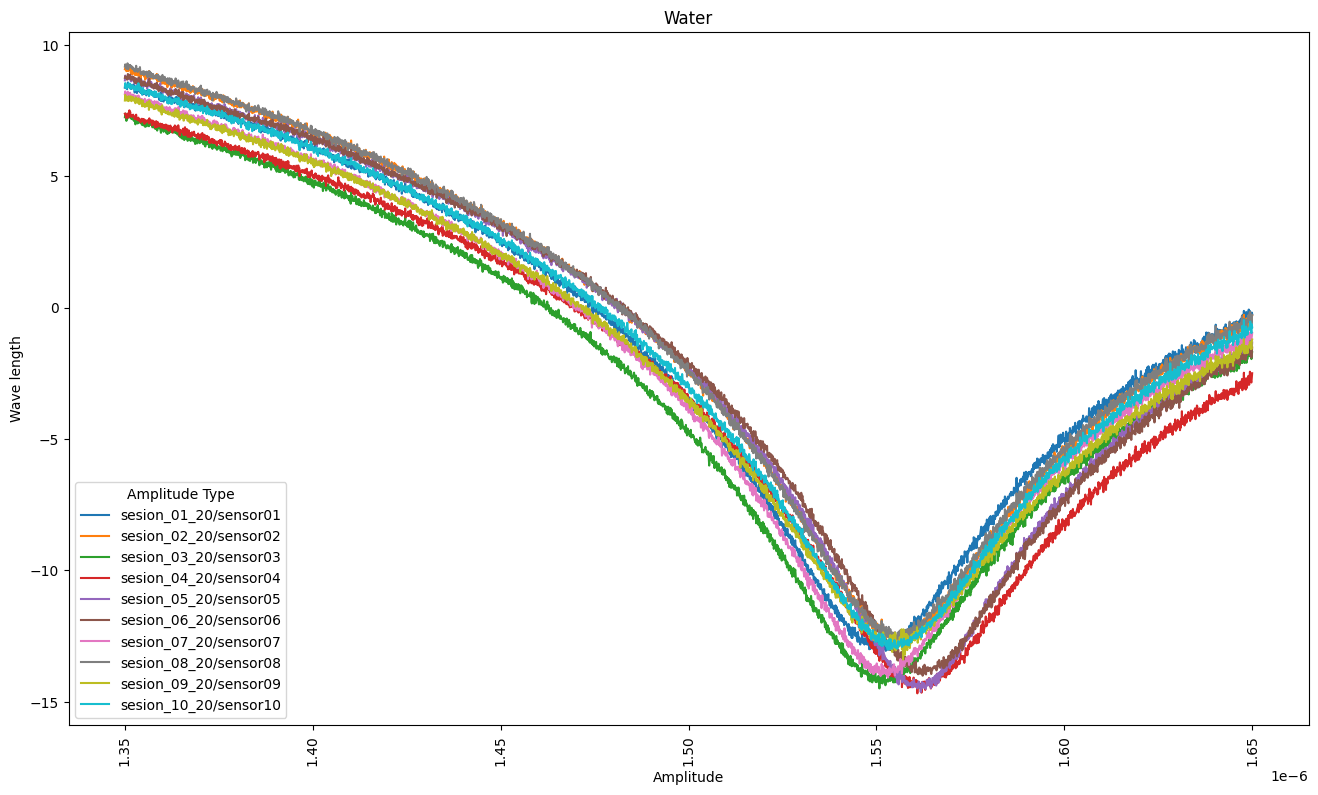

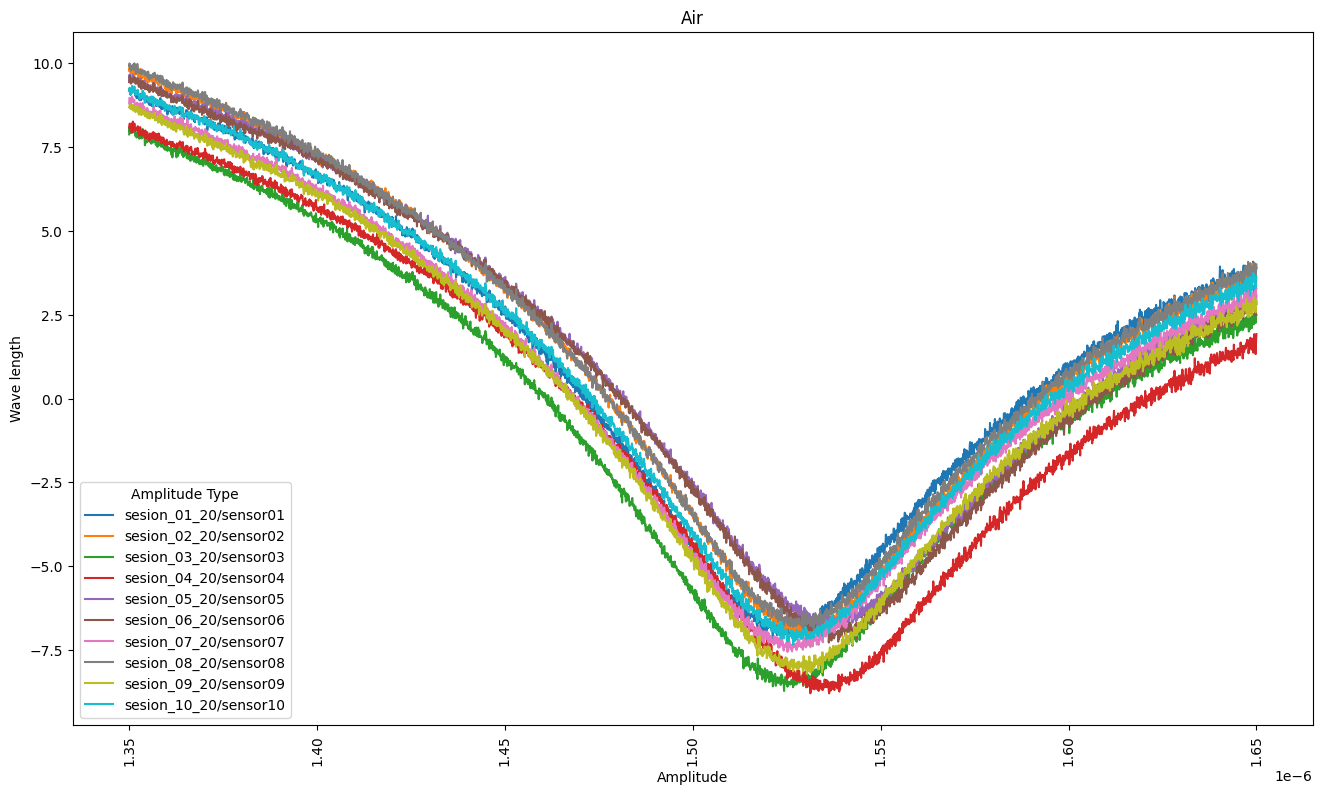

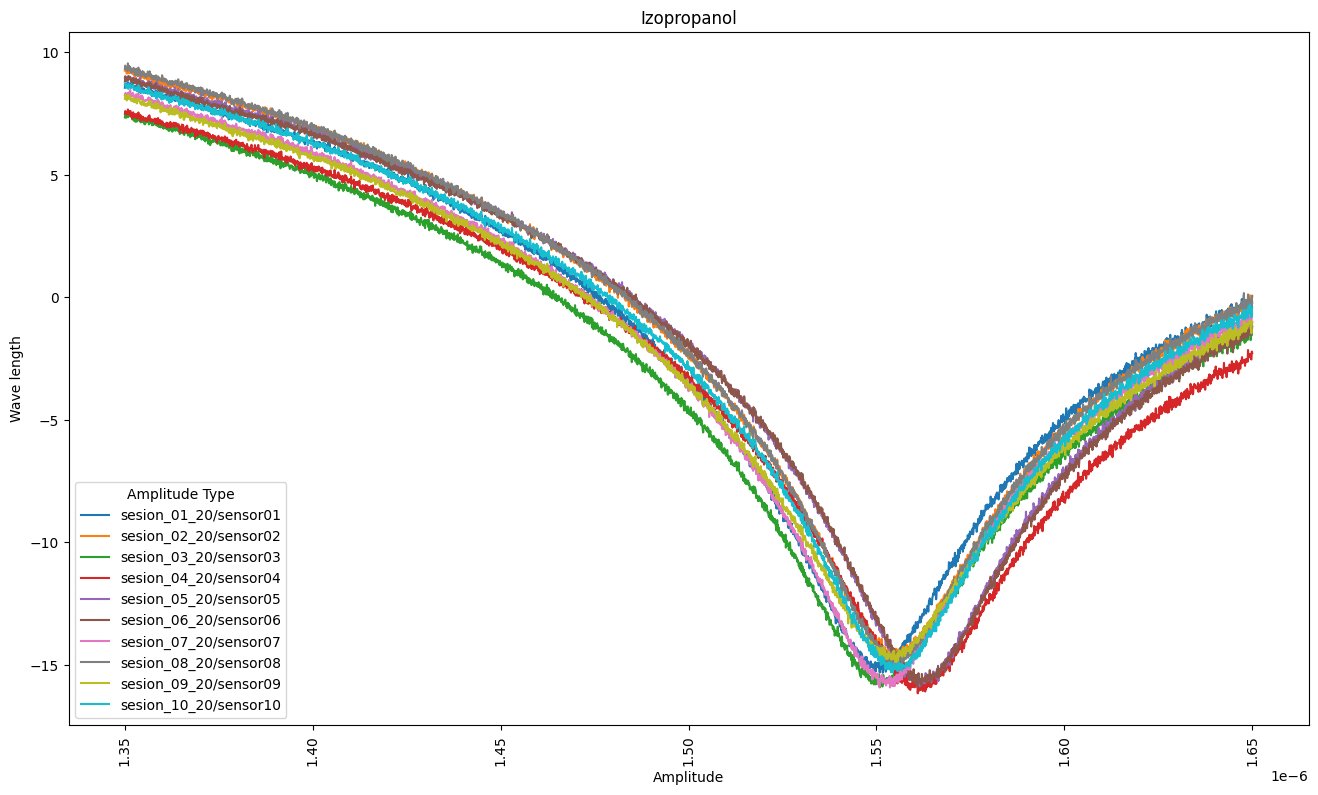

In [8]:
amplitude_graph(data1,'amplitude_w', 'Water')
amplitude_graph(data1,'amplitude_a', 'Air')
amplitude_graph(data1,'amplitude_i', 'Izopropanol')

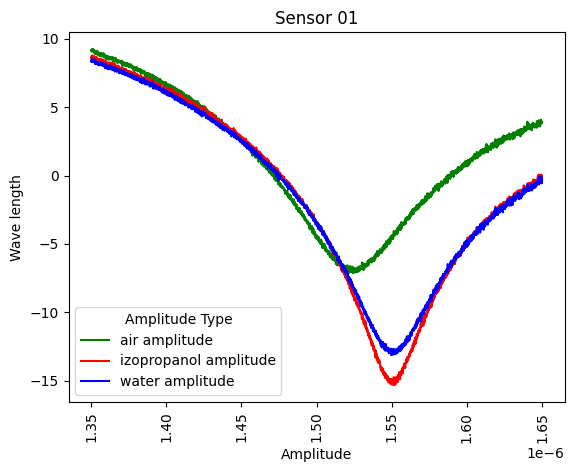

In [9]:
fig, ax = plt.subplots()

ax.plot(df1.wavelength, df1.amplitude_a, color='g', label = 'air amplitude')
ax.plot(df1.wavelength, df1.amplitude_i, color='r', label = 'izopropanol amplitude')
ax.plot(df1.wavelength, df1.amplitude_w, color='b', label = 'water amplitude')
ax.legend(title='Amplitude Type', loc='lower left', shadow=False)
ax.set_title('Sensor 01')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Wave length')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [10]:
data1.isnull().sum()

wavelength     0
amplitude_w    0
amplitude_i    0
amplitude_a    0
sensor         0
dtype: int64

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30010 entries, ('sesion_01_20/sensor01', 0) to ('sesion_10_20/sensor10', 30009)
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wavelength   30010 non-null  float64
 1   amplitude_w  30010 non-null  float64
 2   amplitude_i  30010 non-null  float64
 3   amplitude_a  30010 non-null  float64
 4   sensor       30010 non-null  object 
dtypes: float64(4), object(1)
memory usage: 2.5+ MB


In [12]:
#Detecting the outliers

box = px.box(data1, y=['amplitude_a','amplitude_i', 'amplitude_w'])
box.show()

In [13]:
data1.describe() 

,wavelength,amplitude_w,amplitude_i,amplitude_a
count,3.001000e+04,30010.000000,30010.000000,30010.000000
mean,1.500000e-06,-1.717725,-1.765555,0.799809
std,8.663285e-08,6.560504,6.973005,4.903714
min,1.350000e-06,-14.673000,-16.165000,-8.798200
25%,1.425000e-06,-6.825600,-6.877225,-3.203700
50%,1.500000e-06,-1.859100,-1.625000,1.009450
75%,1.575000e-06,4.331600,4.584075,4.794300
max,1.650000e-06,9.284900,9.551500,10.003000


# **ALGORITHMS AND MODEL TRAINING FOR IZOPROPANOL AMPLITUDE:** 

In [14]:
y = data1['amplitude_i']
X = data1.drop(['amplitude_i', 'amplitude_w', 'sensor'], axis=1)

In [15]:
#Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(24008, 2) (24008,)
(6002, 2) (6002,)


 Fit a model linear regression

---


In [39]:
model= linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_train, y_train)

0.8912734382104173

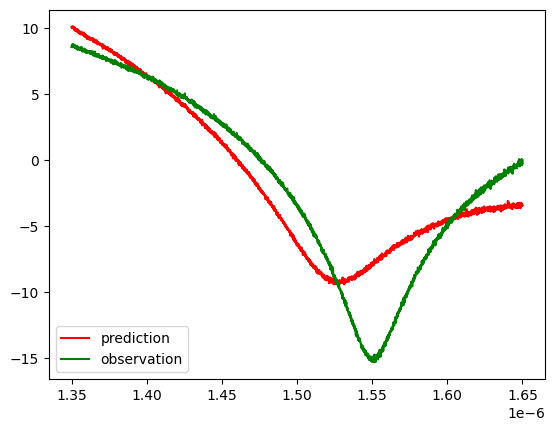

In [38]:
prediction_graph(df1.amplitude_i)
plt.savefig('i_prediction.png')

In [23]:
with open('model_i','wb') as file:
    pickle.dump(model,file)

# **ALGORITHMS AND MODEL TRAINING FOR WATER AMPLITUDE:** 

In [24]:
y = data1['amplitude_w']
X = data1.drop(['amplitude_w', 'amplitude_i', 'sensor'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)


R2 score: 0.8869373190446324


[10.08875337 10.10435385 10.09832115 ... -3.46847322 -3.37425459
 -3.42047576]


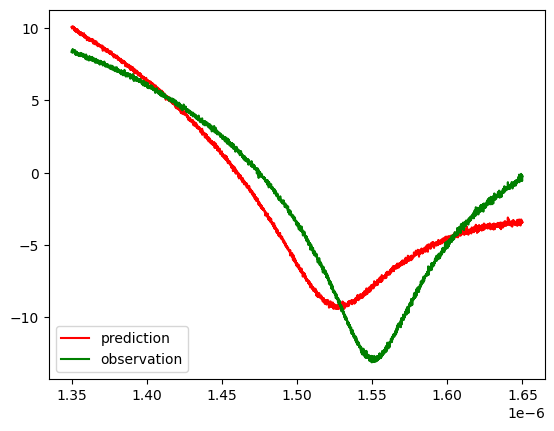

In [32]:
prediction_graph(df1.amplitude_w)
plt.savefig('ii_prediction.png')

# **Trying other models**

Epoch 1/50
1501/1501 [==============================] - 7s 4ms/step - loss: 9.2546
Epoch 2/50
1501/1501 [==============================] - 5s 3ms/step - loss: 8.0749
Epoch 3/50
1501/1501 [==============================] - 6s 4ms/step - loss: 8.0751
Epoch 4/50
1501/1501 [==============================] - 5s 3ms/step - loss: 8.0233
Epoch 5/50
1501/1501 [==============================] - 5s 3ms/step - loss: 8.0289
Epoch 6/50
1501/1501 [==============================] - 6s 4ms/step - loss: 8.0093
Epoch 7/50
1501/1501 [==============================] - 5s 3ms/step - loss: 8.0022
Epoch 8/50
1501/1501 [==============================] - 5s 3ms/step - loss: 8.0122
Epoch 9/50
1501/1501 [==============================] - 6s 4ms/step - loss: 7.9788
Epoch 10/50
1501/1501 [==============================] - 5s 3ms/step - loss: 7.9824
Epoch 11/50
1501/1501 [==============================] - 5s 3ms/step - loss: 7.9765
Epoch 12/50
1501/1501 [==============================] - 5s 3ms/step - loss: 7.9769
E

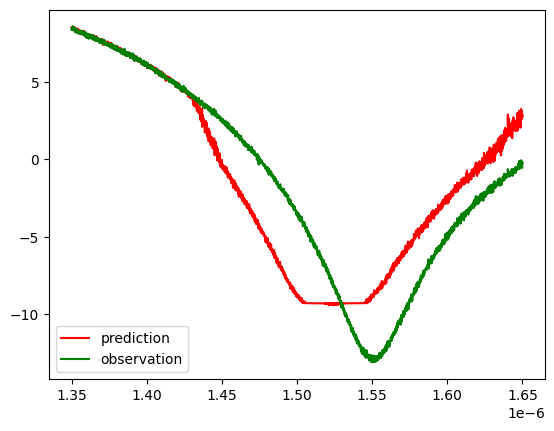

In [39]:
y = data1['amplitude_w']
X = data1.drop(['amplitude_w', 'amplitude_i', 'sensor'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = Sequential()
model.add(Dense(units=64, input_dim=2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='linear'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=50, batch_size=16)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

prediction_graph(df1.amplitude_w)

R2 score: 0.7892905626618678
[8.21188338 8.23686606 8.23272202 ... 1.88558211 2.01641558 1.95816212]


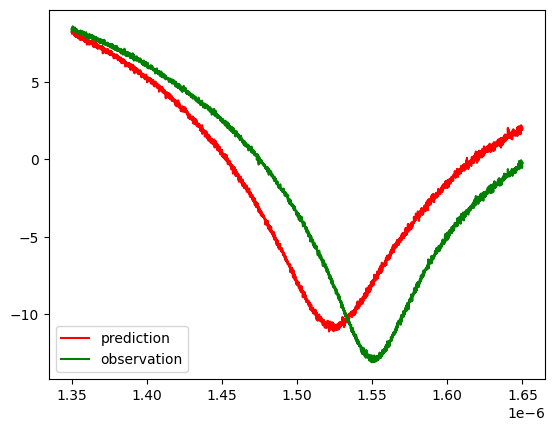

In [37]:
prediction_sensors = ['sesion_01_20/sensor01', 'sesion_02_20/sensor02', 'sesion_04_20/sensor04', 'sesion_05_20/sensor05', 
                      'sesion_06_20/sensor06', 'sesion_07_20/sensor07', 'sesion_09_20/sensor09', 'sesion_10_20/sensor10']
data1 = create_df(sensors)
data1
y = data1['amplitude_w']
X = data1.drop(['amplitude_w', 'amplitude_i', 'sensor'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Inicjalizacja modelu Lasso
model = Lasso(alpha=0.1)

# Trenowanie modelu
model.fit(X_train, y_train)

# Przewidywanie wartości y dla zbioru testowego
y_pred = model.predict(X_test)

# Obliczenie współczynnika R2
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

prediction_graph(df1.amplitude_w)

Among the tested models, the linear regression model performs best.

In [ ]:
stac